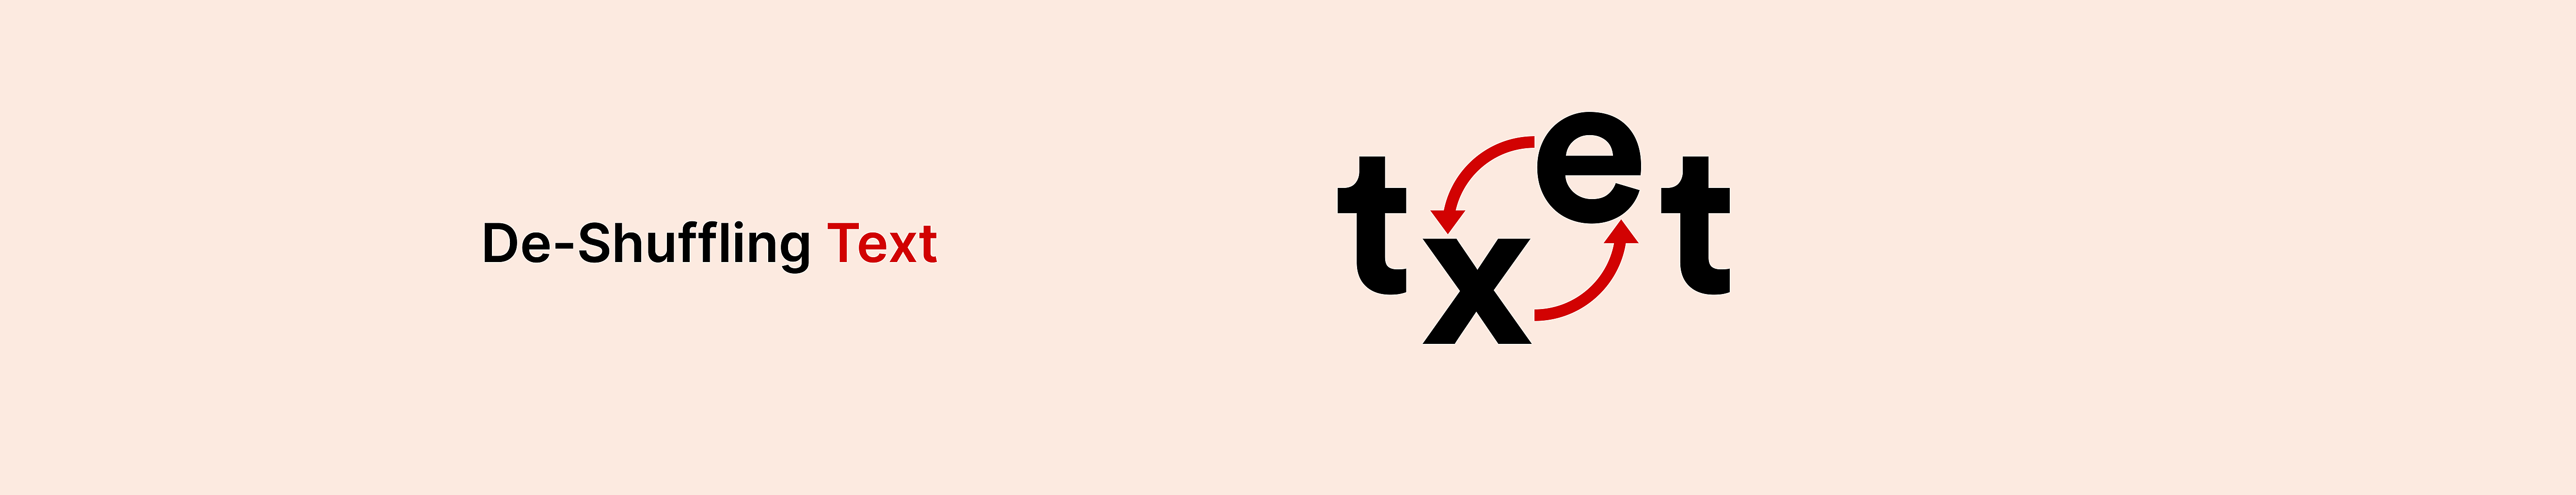

<h2><center>Starter Code for Scambled Text</center></h2>

<!-- <h6><center>Author : Shubhamai</center></h6> -->



<!-- --- -->



 

### Downloading Dataset

AIcrowd had a recent addition that allows you to directly download the dataset from any challenge using AIcrowd CLI. 

So we will first need to download the python library by AIcrowd that will allow us to download the dataset by just inputting the API key. 

In [ ]:
!pip install aicrowd-cli

     |████████████████████████████████| 51kB 7.7MB/s 
     |████████████████████████████████| 81kB 12.3MB/s 
     |████████████████████████████████| 61kB 10.6MB/s 
     |████████████████████████████████| 61kB 9.8MB/s 
     |████████████████████████████████| 174kB 38.7MB/s 
     |████████████████████████████████| 215kB 43.7MB/s 
     |████████████████████████████████| 71kB 12.0MB/s 
     |████████████████████████████████| 51kB 9.6MB/s 
ERROR: google-colab 1.0.0 has requirement requests~=2.23.0, but you'll have requests 2.25.1 which is incompatible.
ERROR: datascience 0.10.6 has requirement folium==0.2.1, but you'll have folium 0.8.3 which is incompatible.
  Found existing installation: tqdm 4.41.1
    Uninstalling tqdm-4.41.1:
      Successfully uninstalled tqdm-4.41.1
  Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0


API Key valid
Saved API Key successfully!


In [ ]:
# Downloading the Dataset
!rm -rf data
!mkdir data


test.csv:   0% 0.00/1.83M [00:00<?, ?B/s]
val.csv:   0% 0.00/714k [00:00<?, ?B/s]
val.csv: 100% 714k/714k [00:00<00:00, 2.19MB/s]
test.csv: 100% 1.83M/1.83M [00:00<00:00, 4.37MB/s]
train.csv: 100% 7.00M/7.00M [00:00<00:00, 11.9MB/s]


### Downloading & Importing Libraries

Here we are going to use [HuggingFace 🤗](https://huggingface.co/) ! [HuggingFace](https://huggingface.co/) is a fast growing startup based on  Natural Language Processing providing many open source Natueal Language Processing libraries including [**transforms**](https://huggingface.co/transformers/), for using start-of-the-art transformers for Natural Language Processing tasks and [**datasets**](https://huggingface.co/docs/datasets/) containing datasets of NLP, and many evaluation metrics.

In [ ]:
# Installing
!pip install datasets transformers rich

     |████████████████████████████████| 245kB 26.2MB/s 
     |████████████████████████████████| 2.5MB 41.6MB/s 
     |████████████████████████████████| 245kB 54.5MB/s 
     |████████████████████████████████| 71kB 11.1MB/s 
     |████████████████████████████████| 122kB 55.3MB/s 
     |████████████████████████████████| 901kB 46.6MB/s 
     |████████████████████████████████| 3.3MB 51.4MB/s 
ERROR: aicrowd-cli 0.1.7 has requirement tqdm<5,>=4.56.0, but you'll have tqdm 4.49.0 which is incompatible.
  Found existing installation: tqdm 4.61.1
    Uninstalling tqdm-4.61.1:
      Successfully uninstalled tqdm-4.61.1


In [ ]:
# Importing Libraries
import pandas as pd
import numpy as np
import os

import torch
import datasets
from datasets import load_dataset
from transformers import EncoderDecoderModel,RobertaTokenizer, EncoderDecoderConfig, BertTokenizerFast, Seq2SeqTrainingArguments, Seq2SeqTrainer, BertConfig

# To make cell output more beautiful! 
from rich.console import Console
from rich.table import Table
from rich import pretty
pretty.install()

# function to display YouTube videos
from IPython.display import YouTubeVideo

### Reading Dataset

Reading the necessary files to train, validation & submit our results! 

In [ ]:
train_dataset = pd.read_csv("data/train.csv")
validation_dataset = pd.read_csv("data/val.csv")
test_dataset = pd.read_csv("data/test.csv")

train_dataset

text 
 label 
 
 
 
 
 0 
 presented here Furthermore, naive improved. im... 
 Furthermore, the naive implementation presente... 
 
 
 1 
 vector a in a form vector multidimensional spa... 
 Those coefficients form a vector in a multidim... 
 
 
 2 
 compatible of The model with recent is model s... 
 The model is compatible with a recent model of... 
 
 
 3 
 but relevance outlined. hemodynamics its based... 
 The model is based on electrophysiology, but i... 
 
 
 4 
 of transitions lever-like involve reorientatio... 
 Conformational transitions in macromolecular c... 
 
 
 ... 
 ... 
 ... 
 
 
 39996 
 for pose a clutter. estimation autonomous mani... 
 Object pose estimation is a crucial prerequisi... 
 
 
 39997 
 objects added warehouses bin-picking present s... 
 Real-world bin-picking settings such as wareho... 
 
 
 39998 
 validation The proposed real-world on is metho... 
 The proposed method is evaluated on a syntheti... 
 
 
 39999 
 a between modes. statistics survival qualitati... 
 This breakdown is associated with a crossover ... 
 
 
 40000 
 a image super of resolution great low-level vi... 
 Single image super resolution is of great impo... 
 
 
 
 40001 rows × 2 columns

As we can see the **text** column contains senteces with shuffled words and the label column contining the corresponding sentences in correct form. 

In the below cell, we are using huggingface's dataset library to load our dataset, as you will see, this will help a lot in preprocessing our texts, and creating batches to put into the transformer model! 

In [ ]:
# Loading the training, validation and testing dataset
dataset = load_dataset('csv', data_files={"train"     : ["data/train.csv"], 
                                          "validation": ["data/val.csv"], 
                                          "test"      : ["data/test.csv"]})
dataset

Using custom data configuration default-86493f609ca25aca


Dataset csv downloaded and prepared to /root/.cache/huggingface/datasets/csv/default-86493f609ca25aca/0.0.0/2dc6629a9ff6b5697d82c25b73731dd440507a69cbce8b425db50b751e8fcfd0. Subsequent calls will reuse this data.


DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 40001
    })
    validation: Dataset({
        features: ['label', 'text'],
        num_rows: 4001
    })
    test: Dataset({
        features: ['label', 'text'],
        num_rows: 10000
    })
})

# Preprocessing the dataset 🏭

There's a lot going on in below cell, let's debrief one by one!



### Understanding BERT Tokenizer

Now, we have already talked about what is tokenizer before, but we are going to covert a very little bit ot again and we are also getting some new things too things, so let's start - 

In [ ]:
# So, we importing our tokenizer using transformers library, now the bert-base-uncased is the pretrained bert model, ( here uncased means that it is training using only lowercase words) 
# So, we will be using bert-base-uncased as our pretrained model for tokenization 

#tokenizer = BertTokenizerFast.from_pretrained("google/bert_uncased_L-12_H-512_A-8")
tokenizer=RobertaTokenizer.from_pretrained("roberta-base")
tokenizer

PreTrainedTokenizer(name_or_path='roberta-base', vocab_size=50265, model_max_len=512, is_fast=False, padding_side='right', special_tokens={'bos_token': AddedToken("<s>", rstrip=False, lstrip=False, single_word=False, normalized=True), 'eos_token': AddedToken("</s>", rstrip=False, lstrip=False, single_word=False, normalized=True), 'unk_token': AddedToken("<unk>", rstrip=False, lstrip=False, single_word=False, normalized=True), 'sep_token': AddedToken("</s>", rstrip=False, lstrip=False, single_word=False, normalized=True), 'pad_token': AddedToken("<pad>", rstrip=False, lstrip=False, single_word=False, normalized=True), 'cls_token': AddedToken("<s>", rstrip=False, lstrip=False, single_word=False, normalized=True), 'mask_token': AddedToken("<mask>", rstrip=False, lstrip=True, single_word=False, normalized=True)})

Above, you can see that the tokenizer has many parameters by default, **vocab size** number of elements in a set of the words familiar to the tokenizer, **max length** is the total number of tokenizer the model can output, we will talk about the padding soon. 
Special Tokens, for ex. **unk token** represents a word found in theinputted text, which was not in the vocab of the model, and there are other tokens too, for ex. **sep token** which represents different senteces in a inputted text

In [ ]:
sample_text = train_dataset['label'][0]
sample_text

'Furthermore, the naive implementation presented here can be improved.'

In [ ]:
# Splitting the inputted sentece into words
tokens = tokenizer.tokenize(sample_text)

# Convert the unique words into a specific number which is already mapped by the pretrained bert model 
token_ids = tokenizer.convert_tokens_to_ids(tokens)


print("Sample Text : ", sample_text)
print("Tokens      : ", tokens)
print("Token Ids   : ", token_ids)

Sample Text :  Furthermore, the naive implementation presented here can be improved.
Tokens      :  ['Furthermore', ',', 'Ġthe', 'Ġnaive', 'Ġimplementation', 'Ġpresented', 'Ġhere', 'Ġcan', 'Ġbe', 'Ġimproved', '.']
Token Ids   :  [42395, 6, 5, 25672, 5574, 2633, 259, 64, 28, 2782, 4]


In [ ]:
# To convert a token ids back to origin string, we can simply use

output_text = tokenizer.decode(token_ids)
output_text

'Furthermore, the naive implementation presented here can be improved.'

## Creating the Dataset

In [ ]:
# To have consistent dimensions of output vector accross the samples, we have to set the maximam number of tokens for each sample.  
MAX_TEXT_LENGTH = 20
MAX_LABEL_LENGTH = 20

def preprocess_function(sample):
  
  # Getting text and label
  text = sample["text"]
  label = sample["label"]

  # Tokenizing the text and label
  inputs = tokenizer(text, padding="max_length", truncation=True, max_length=MAX_TEXT_LENGTH)
  outputs = tokenizer(label, padding="max_length", truncation=True, max_length=MAX_LABEL_LENGTH)


  sample["input_ids"] = inputs.input_ids
  sample["attention_mask"] = inputs.attention_mask
  sample["decoder_input_ids"] = outputs.input_ids
  sample["decoder_attention_mask"] = outputs.attention_mask
  sample["labels"] = outputs.input_ids

  # The labels are used to calcuate the loss while training, and because we added padding to make all tokens to be of same size,
  # we also need to convert the padding number ( 0 ) to ( -100 ), so that we can tell huggingface that these number can be ignorned while calcuating loss. 
  # Why specifically -100 ? It's simply an arbitrary number, again so that huggingface can ignore this number while calcuating loss
      
  sample["labels"] = [[-100 if token == tokenizer.pad_token_id else token for token in labels] for labels in sample["labels"]]

  return sample

So, let's talk about padding, truncation and this max length stuff! Similar to convlution neural networks, which requires images to be of same size, transformers also requires to have the tokens of same size, but senteces can be of different size, so what do we do ? 

Let's face it, these are three senteces -
1. *i have bought several of the vitality*
2. *food products and have found them all to be of good quality*
3. *my labrador is finicky and she appreciates this product better than  most*

And we set our `max tokens` to be 9. 

Here are the correspoding token ids of the sentences - 
1. `[1045, 2031, 4149, 2195, 1997, 1996, 8995, 3012]`
2. `[2833, 3688, 1998, 2031, 2179, 2068, 2035, 2000, 2022, 1997, 2204, 3737]`
3. `[2026, 18604, 2003, 10346, 6799, 2100, 1998, 2016, 9120, 2015, 2023, 4031, 2488, 2084, 2087]`

How, all these 3 list have different length, to make then of same lenght, we use 2 things, **padding** and **truncation** - 
1. In **padding**, we simply add zero ( 0 ), either left/right to make the tokens idea same length as the `max tokens`. In this 1. case, padding will be added to become like this
  1. `[1045, 2031, 4149, 2195, 1997, 1996, 8995, 3012, 0]`

2. In **truncation**, we simply remove the tokne ids, either left or right, to make the sentence same length as the `max tokens`. 
  2. `[2833, 3688, 1998, 2031, 2179, 2068, 2035, 2000, 2022]`
  3. `[2026, 18604, 2003, 10346, 6799, 2100, 1998, 2016, 9120]`

The **`attention_mask`** for decoder ( label ) and input ( text ) is simply 1 where no paddded is added and 0 for where padding is added!

In [ ]:
# Applying the preprocessing to every sample

BATCH_SIZE = 32
      
tokenized_datasets = dataset.map(preprocess_function, batch_size=BATCH_SIZE, batched=True)

In [ ]:
tokenized_datasets['train'][1]

{
    'attention_mask': [
        1,
        1,
        1,
        1,
        1,
        1,
        1,
        1,
        1,
        1,
        1,
        1,
        1,
        1,
        1,
        0,
        0,
        0,
        0,
        0
    ],
    'decoder_attention_mask': [
        1,
        1,
        1,
        1,
        1,
        1,
        1,
        1,
        1,
        1,
        1,
        1,
        1,
        1,
        1,
        0,
        0,
        0,
        0,
        0
    ],
    'decoder_input_ids': [
        0,
        11195,
        48550,
        1026,
        10,
        37681,
        11,
        10,
        7268,
        808,
        30846,
        37681,
        980,
        4,
        2,
        1,
        1,
        1,
        1,
        1
    ],
    'input_ids': [
        0,
        48219,
        10,
        11,
        10,
        1026,
        37681,
        7268,
        808,
        30846,
        980,
        4,
        2246,
        48550,
        2,
        1,
        1,
        1,
        1,
        1
    ],
    'label': 'Those coefficients form a vector in a multidimensional vector space.',
    'labels': [
        0,
        11195,
        48550,
        1026,
        10,
        37681,
        11,
        10,
        7268,
        808,
        30846,
        37681,
        980,
        4,
        2,
        -100,
        -100,
        -100,
        -100,
        -100
    ],
    'text': 'vector a in a form vector multidimensional space. Those coefficients'
}

In [ ]:
# Convert the list into torch tensor
tokenized_datasets.set_format(
    type="torch", columns=["input_ids", "attention_mask", "decoder_input_ids", "decoder_attention_mask", "labels"],
)

In [ ]:
print(tokenized_datasets['train'][0].keys())
tokenized_datasets['train'][0], tokenized_datasets['train'][1]

dict_keys(['attention_mask', 'decoder_attention_mask', 'decoder_input_ids', 'input_ids', 'labels'])


(
    {
        'attention_mask': tensor([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0]),
        'decoder_attention_mask': tensor([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0]),
        'decoder_input_ids': tensor([    0, 42395,     6,     5, 25672,  5574,  2633,   259,    64,    28,
         2782,     4,     2,     1,     1,     1,     1,     1,     1,     1]),
        'input_ids': tensor([    0, 25870,   196,   259,  9870,     6, 25672,  2782,     4,  5574,
           28,     5,    64,     2,     1,     1,     1,     1,     1,     1]),
        'labels': tensor([    0, 42395,     6,     5, 25672,  5574,  2633,   259,    64,    28,
         2782,     4,     2,  -100,  -100,  -100,  -100,  -100,  -100,  -100])
    },
    {
        'attention_mask': tensor([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0]),
        'decoder_attention_mask': tensor([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0]),
        'decoder_input_ids': tensor([    0, 11195, 48550,  1026,    10, 37681,    11,    10,  7268,   808,
        30846, 37681,   980,     4,     2,     1,     1,     1,     1,     1]),
        'input_ids': tensor([    0, 48219,    10,    11,    10,  1026, 37681,  7268,   808, 30846,
          980,     4,  2246, 48550,     2,     1,     1,     1,     1,     1]),
        'labels': tensor([    0, 11195, 48550,  1026,    10, 37681,    11,    10,  7268,   808,
        30846, 37681,   980,     4,     2,  -100,  -100,  -100,  -100,  -100])
    }
)

# Creating the Model 🤖

We are now creating transformers!

To give a introduction about Transformers, transformers are a deep learnng architecture solving **sequence to sequence** based problems. What are Sequence to Sequence based problems ? I was really suggest to read - 

1. **[Visualizing A Neural Machine Translation Model (Mechanics of Seq2seq Models With Attention)](https://jalammar.github.io/visualizing-neural-machine-translation-mechanics-of-seq2seq-models-with-attention/)** blog from [Jay Alammar](https://twitter.com/JayAlammar)  



Now, another question you might having is that why we are using Transformers, where LSTM not enough ? Well, the main issue about LSTM was that - 
1. Slow to train
2. Fails to retain the information in a text for longer period of time. 
and much more. 
3. LSTM still weren't able to fully erase the `vanishing gradient` problem which plagued RNNs. Vanishing gradients is that problem when in backpropagation, the change in weights in first few layers is pretty much negligible compared to the last layers.  

A new research paper, [Attention Is All You Need](https://arxiv.org/abs/1706.03762) solved many of these issues. And transformers were hugely inspired by attention mechanisms. To learn more about attention, the blog in 1. has a lot of visualisations about it, go and check it out! After that, you are ready to understand trasnformers!


2. [**The Illustrated Transformer**](https://jalammar.github.io/illustrated-transformer/) from the same author above.  

  Optional, but helpful - 

  2.1 [**Interfaces for Explaining Transformer Language Models**](https://jalammar.github.io/explaining-transformers/)

  2.2  [**Finding the Words to Say: Hidden State Visualizations for Language Models**](https://jalammar.github.io/hidden-states/)


3. And now you will be ready to understand BERT, aftet reading this blog! [**A Visual Guide to Using BERT for the First Time**](https://jalammar.github.io/a-visual-guide-to-using-bert-for-the-first-time/)

You might see guessing why i bombarded with so many blogs, transformers are really tricky to understand and one of the most unique things about Jay Alammar blogs is that there are a lot of visualisations that can help you really grasp the fundamentals of of any topic. 

In [ ]:
# Using a pretrained BERT Model
model = EncoderDecoderModel.from_encoder_decoder_pretrained("roberta-base", "roberta-base")

Some weights of the model checkpoint at roberta-base were not used when initializing RobertaModel: ['lm_head.dense.bias', 'lm_head.layer_norm.weight', 'lm_head.layer_norm.bias', 'lm_head.decoder.weight', 'lm_head.bias', 'lm_head.dense.weight']
- This IS expected if you are initializing RobertaModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of RobertaForCausalLM were not initialized from the model checkpoint at roberta-base and are newly initialized: ['roberta.encoder.layer.8.crossattention.output.dense.bias', 'roberta.encoder.layer.4.crossattention.self.query.weight', 'roberta.encoder.layer.2.crossattention.output.Laye

In [ ]:
# The model architecture
model

EncoderDecoderModel(
  (encoder): RobertaModel(
    (embeddings): RobertaEmbeddings(
      (word_embeddings): Embedding(50265, 768, padding_idx=1)
      (position_embeddings): Embedding(514, 768, padding_idx=1)
      (token_type_embeddings): Embedding(1, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): RobertaEncoder(
      (layer): ModuleList(
        (0): RobertaLayer(
          (attention): RobertaAttention(
            (self): RobertaSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): RobertaSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
          )
          (intermediate): RobertaIntermediate(
            (dense): Linear(in_features=768, out_features=3072, bias=True)
          )
          (output): RobertaOutput(
            (dense): Linear(in_features=3072, out_features=768, bias=True)
            (LayerNorm): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
            (dropout): Dropout(p=0.1, inplace=False)
          )
        )
        (1): RobertaLayer(
          (attention): RobertaAttention(
            (self): RobertaSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): RobertaSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
          )
          (intermediate): RobertaIntermediate(
            (dense): Linear(in_features=768, out_features=3072, bias=True)
          )
          (output): RobertaOutput(
            (dense): Linear(in_features=3072, out_features=768, bias=True)
            (LayerNorm): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
            (dropout): Dropout(p=0.1, inplace=False)
          )
        )
        (2): RobertaLayer(
          (attention): RobertaAttention(
            (self): RobertaSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): RobertaSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
          )
          (intermediate): RobertaIntermediate(
            (dense): Linear(in_features=768, out_features=3072, bias=True)
          )
          (output): RobertaOutput(
            (dense): Linear(in_features=3072, out_features=768, bias=True)
            (LayerNorm): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
            (dropout): Dropout(p=0.1, inplace=False)
          )
        )
        (3): RobertaLayer(
          (attention): RobertaAttention(
            (self): RobertaSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out

# Training the model

## Setting up Training

In [ ]:
# Setting up the parameters
model.config.decoder_start_token_id = tokenizer.cls_token_id
model.config.eos_token_id = tokenizer.sep_token_id
model.config.pad_token_id = tokenizer.pad_token_id
model.config.vocab_size = model.config.encoder.vocab_size

In [37]:
# Setting up, batch size, number of epochs

N_EPOCHS = 1

args = Seq2SeqTrainingArguments(
    "Scambled Text",
    evaluation_strategy = "epoch",
    per_device_train_batch_size=BATCH_SIZE,
    per_device_eval_batch_size=BATCH_SIZE,
    num_train_epochs=N_EPOCHS,
    fp16=True, # This will hlep in increasing the speed of training
)

PyTorch: setting up devices
The default value for the training argument `--report_to` will change in v5 (from all installed integrations to none). In v5, you will need to use `--report_to all` to get the same behavior as now. You should start updating your code and make this info disappear :-).


In [38]:
# Setting up training

trainer = Seq2SeqTrainer(
    model=model,
    args=args,
    train_dataset=tokenized_datasets['train'],
    eval_dataset=tokenized_datasets['validation'],
)

Using amp fp16 backend


## Training
🚀 Let's goooo!

In [39]:
# This will take around 20-25 minutes 
trainer.train()

The following columns in the training set  don't have a corresponding argument in `EncoderDecoderModel.forward` and have been ignored: text.
***** Running training *****
  Num examples = 40001
  Num Epochs = 1
  Instantaneous batch size per device = 32
  Total train batch size (w. parallel, distributed & accumulation) = 32
  Gradient Accumulation steps = 1
  Total optimization steps = 1251


[1251/1251 08:51, Epoch 1/1]
 
 
 
 
 Epoch 
 Training Loss 
 Validation Loss 
 
 
 
 
 1 
 2.121700 
 1.912234

/usr/local/lib/python3.7/dist-packages/transformers/trainer.py:1299: FutureWarning: Non-finite norm encountered in torch.nn.utils.clip_grad_norm_; continuing anyway. Note that the default behavior will change in a future release to error out if a non-finite total norm is encountered. At that point, setting error_if_nonfinite=false will be required to retain the old behavior.
  args.max_grad_norm,
Saving model checkpoint to Scambled Text/checkpoint-500
Configuration saved in Scambled Text/checkpoint-500/config.json
Model weights saved in Scambled Text/checkpoint-500/pytorch_model.bin
Saving model checkpoint to Scambled Text/checkpoint-1000
Configuration saved in Scambled Text/checkpoint-1000/config.json
Model weights saved in Scambled Text/checkpoint-1000/pytorch_model.bin
The following columns in the evaluation set  don't have a corresponding argument in `EncoderDecoderModel.forward` and have been ignored: text.
***** Running Evaluation *****
  Num examples = 4001
  Batch size = 32


T

TrainOutput(global_step=1251, training_loss=2.228432268833371, metrics={'train_runtime': 531.6721, 'train_samples_per_second': 75.236, 'train_steps_per_second': 2.353, 'total_flos': 2666081815179120.0, 'train_loss': 2.228432268833371, 'epoch': 1.0})

In the meantime, do make sure to watch [Illustrated Guide to Transformers Neural Network: A step by step explanation
](https://youtu.be/4Bdc55j80l8) by [Michael Phi
](https://twitter.com/LearnedVector), it's a really beautiful video to understand transformers mroe deeply! 

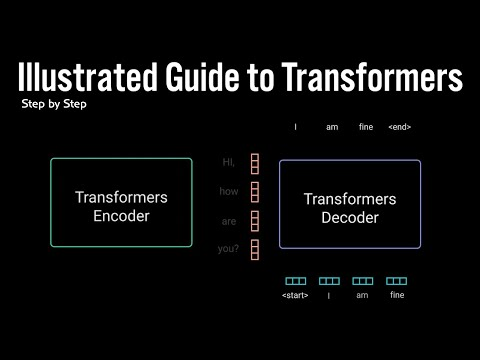

In [40]:
YouTubeVideo('4Bdc55j80l8')

# Submitting Results 📄

Phew! I was a lot of grasp, anyway, let's make a submission real quick.   

In [41]:
# Getting the predictions
def generate_predictions(batch):

    # Tokenizing the test
    inputs = tokenizer(batch["text"], padding="max_length", truncation=True, max_length=MAX_TEXT_LENGTH, return_tensors="pt")
    
    # Sending the tensors to GPU
    input_ids = inputs.input_ids.to("cuda")
    attention_mask = inputs.attention_mask.to("cuda")

    # Generating the predicted tokens ids
    outputs = model.generate(input_ids, attention_mask=attention_mask)

    # Converting the token ids to sentence
    output_str = tokenizer.batch_decode(outputs, skip_special_tokens=True)

    batch["predictions"] = output_str

    return batch

In [42]:
val=dataset['validation'].map(generate_predictions, batched=True, batch_size=16)

In [43]:
!pip install jiwer

In [44]:
from jiwer import wer

In [45]:
validation_dataset['label'][0]

'Single image super resolution is of great importance as a low-level computer vision task.'

In [46]:
val[0]['predictions']

'Single superresolution resolution is super-level importance as a computer vision vision task.'

In [47]:
def Word_error_rate():
  word_error=0
  for vali,truth in zip(val,validation_dataset['label']):
    word_error=word_error+wer(truth, vali['predictions'])
  return word_error/len(val)




In [48]:
Word_error_rate()

0.5443616576708278

In [ ]:
# Getting all results
results = dataset['test'].map(generate_predictions, batched=True, batch_size=16)

In [ ]:
test_dataset

In [ ]:
test_dataset['label'] = results['predictions']
test_dataset

**Note : Please make sure that there should be filename `submission.csv` in `assets` folder before submitting it**

In [ ]:
!mkdir assets
test_dataset.to_csv(os.path.join("assets", "submission.csv"), index=False)

## Uploading the Results 
**Note : Please save the notebook before submitting it (Ctrl + S)**

Congratulations 🎉 you did it, but there still a lot of improvement that can be made, you can try changing many hyperparameters inc. epochs, learning rate or different model architecture!

And btw -

> Don't be shy to ask question related to any errors you are getting or doubts in any part of this notebook in [discussion forum](https://www.aicrowd.com/challenges/ai-blitz-9/problems/de-shuffling-text/discussion) or in [AIcrowd Discord sever](https://discord.gg/T6uZSWBMSZ), AIcrew will be happy to help you :)

Also, want give us your valuable feedback for next blitz or want to work with us creating blitz challanges ? Let us know! 